# 标定数据处理与分析
* 罗翊杰 
* 1951578@tongji.edu.cn
* MERCI Project
* 2023/4/15

### 1. 数据载入
time,x,y,d,press,skin0_x,skin0_y,skin0_z,skin1_x,skin1_y,skin1_z,skin2_x,skin2_y,skin2_z,skin3_x,skin3_y,skin3_z


In [1]:
import numpy as np
# 不同弹性体厚度分析，载入5组数据
# 数据集路径
tset_path = {
    "t14":'./../Data/TSET_squ1803/squ1803_T1.4_C1.0.csv',
    "t17":'./../Data/TSET_squ1803/squ1803_T1.7_C1.0.csv',
    "t20":'./../Data/TSET_squ1803/squ1803_T2.0_C1.0.csv',
    "t23":'./../Data/TSET_squ1803/squ1803_T2.3_C1.0.csv',
    "t26":'./../Data/TSET_singal/squ2011_88.csv',
}
# 载入数据
tset = {}
for t in tset_path:
    print('loading:'+tset_path[t]+'...',end='',flush=True)
    with open(tset_path[t]) as f:
        tset[t] = np.loadtxt(f,delimiter=",",skiprows=1) 
    print('[ok]') 

nt=0
for n in tset['t14'][:,4]:
    if(nt>=1400 and nt<1600):
        tset['t14'][nt,4] = n + 0.77835152585233 + 3.5
    nt+=1


loading:./../Data/TSET_squ1803/squ1803_T1.4_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T1.7_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T2.0_C1.0.csv...[ok]
loading:./../Data/TSET_squ1803/squ1803_T2.3_C1.0.csv...[ok]
loading:./../Data/TSET_singal/squ2011_88.csv...[ok]


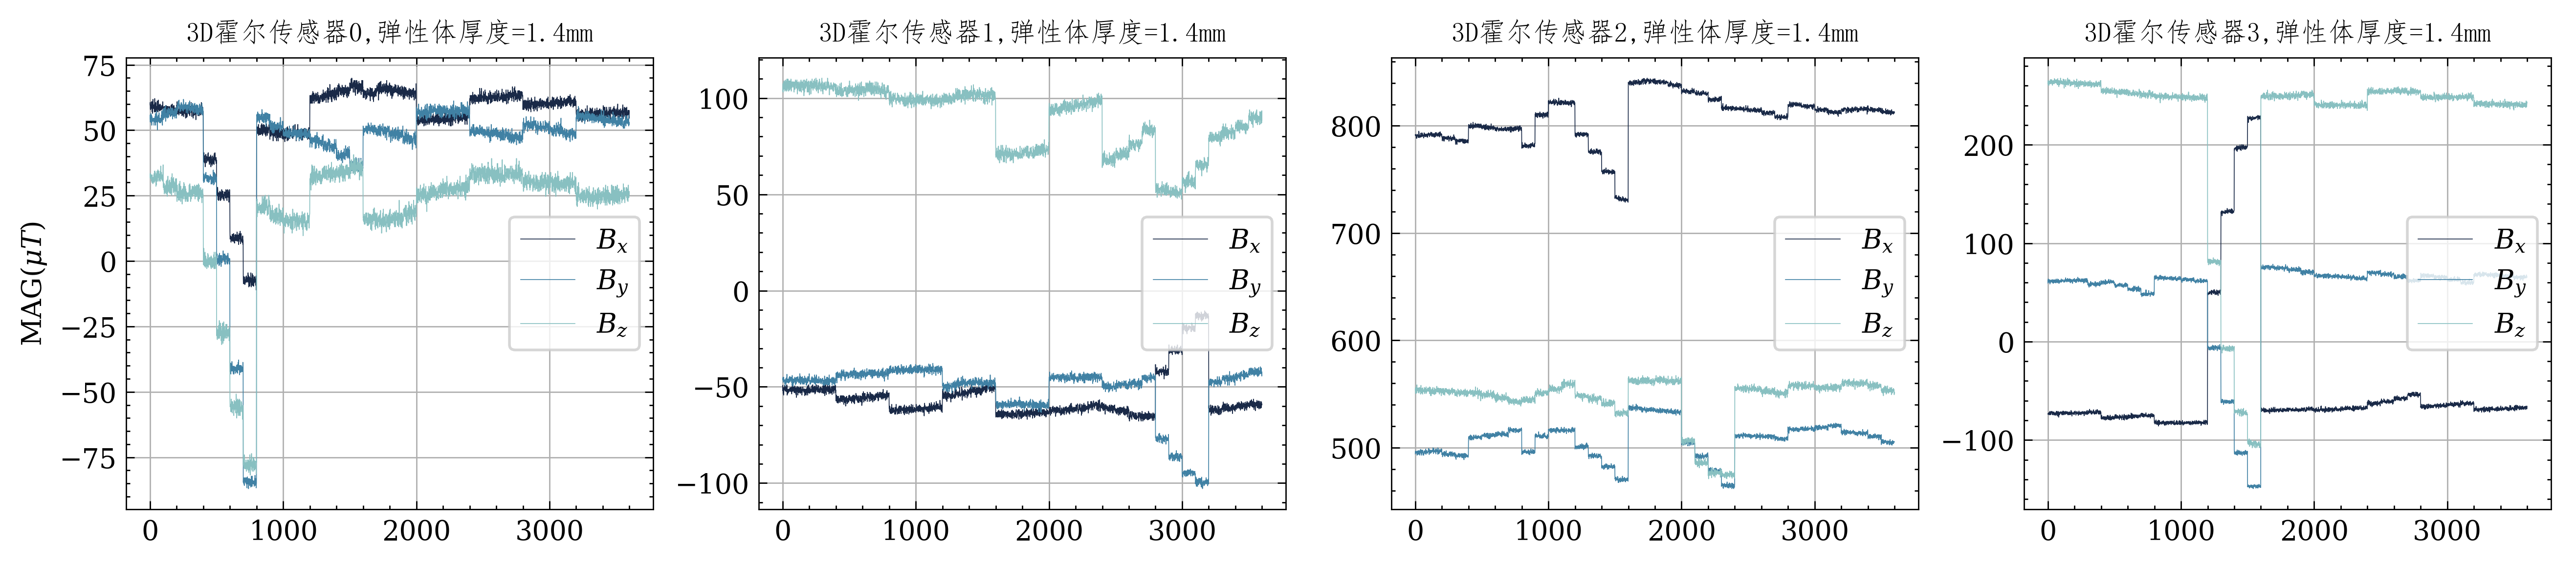

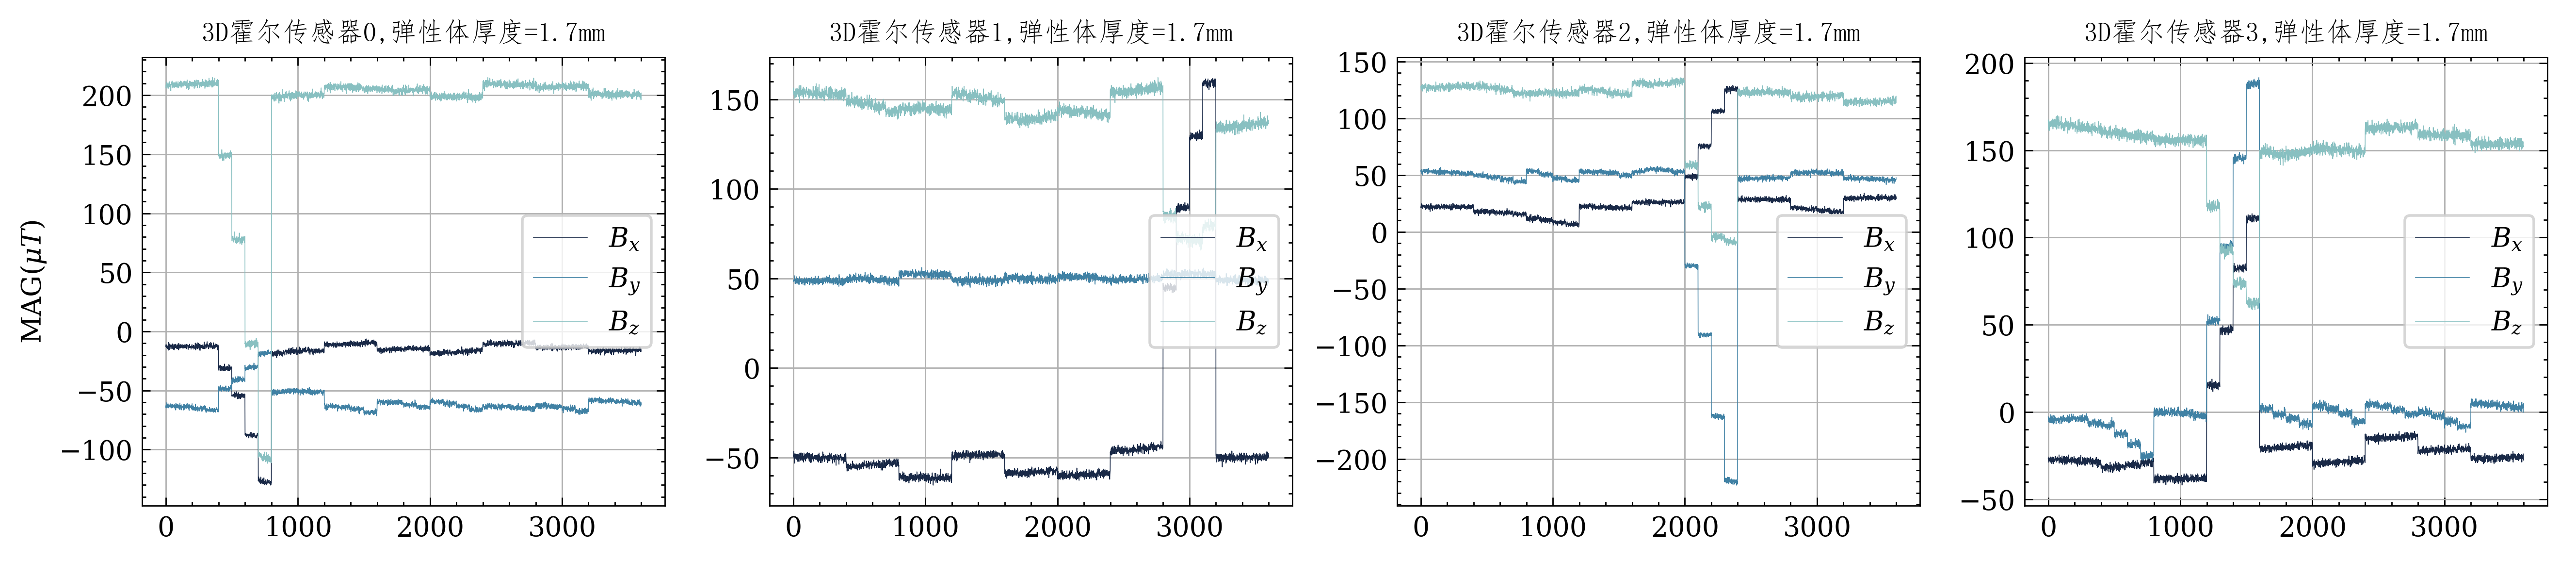

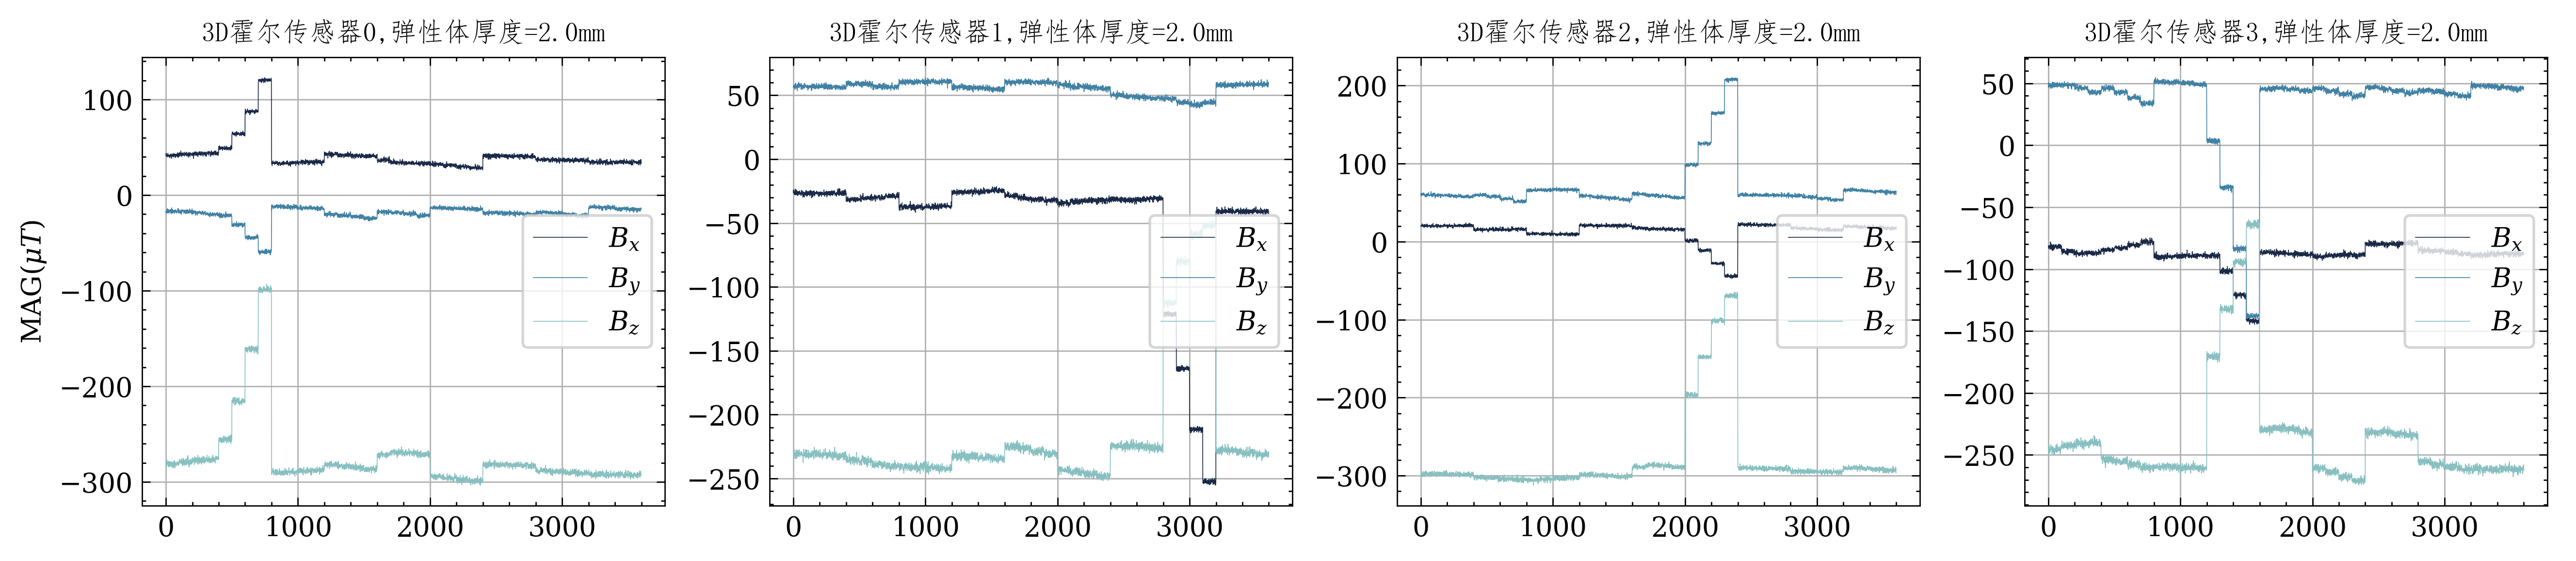

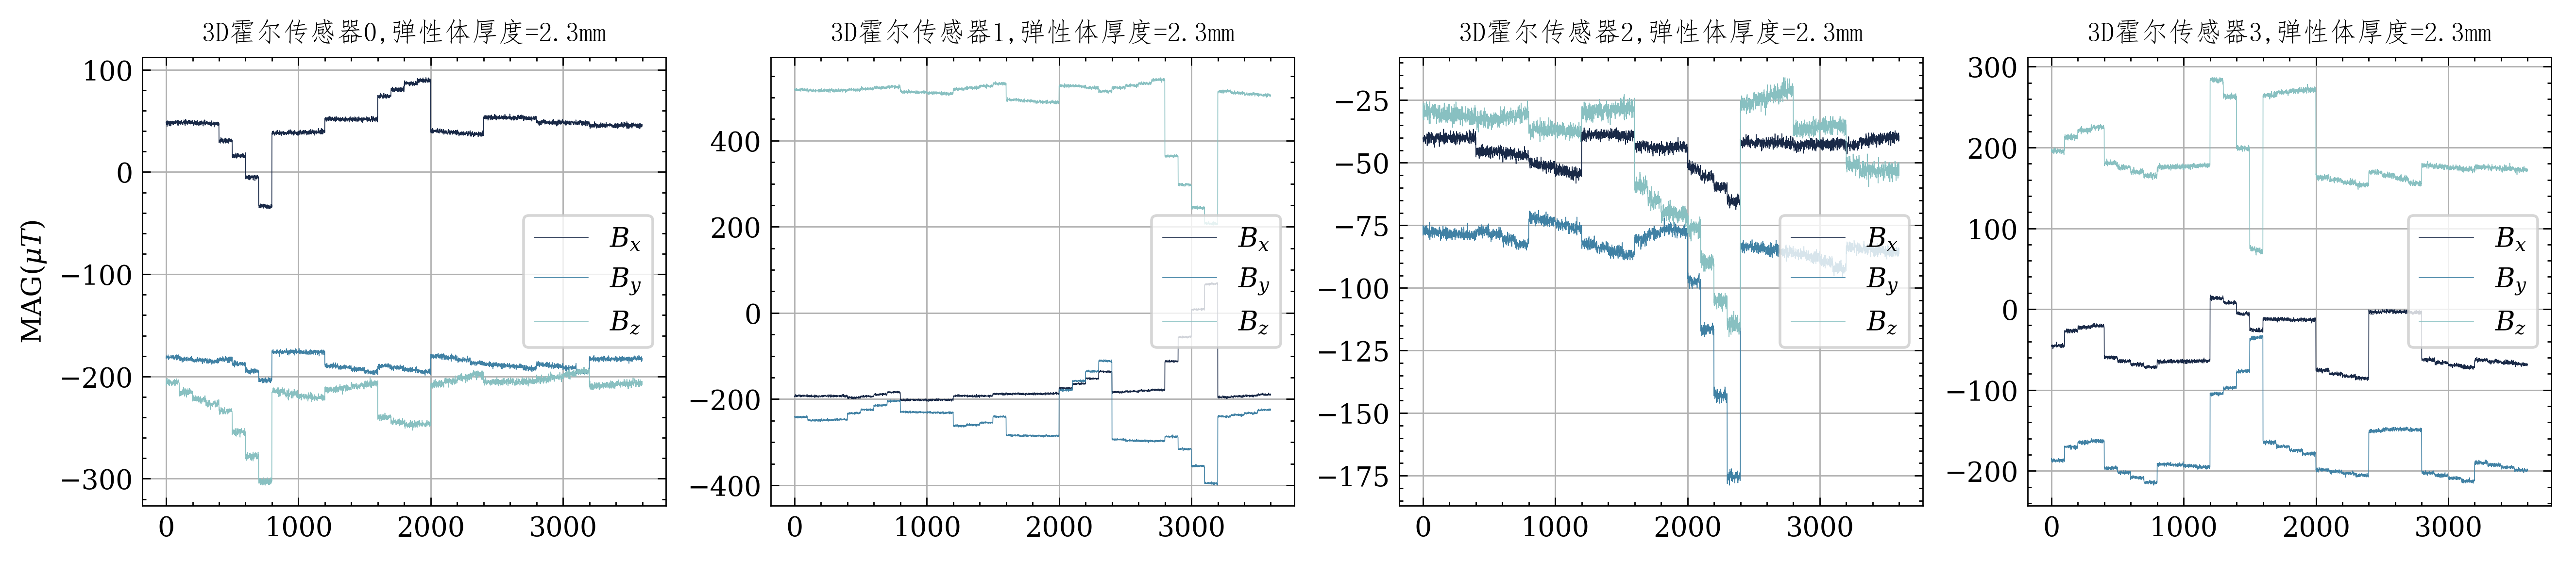

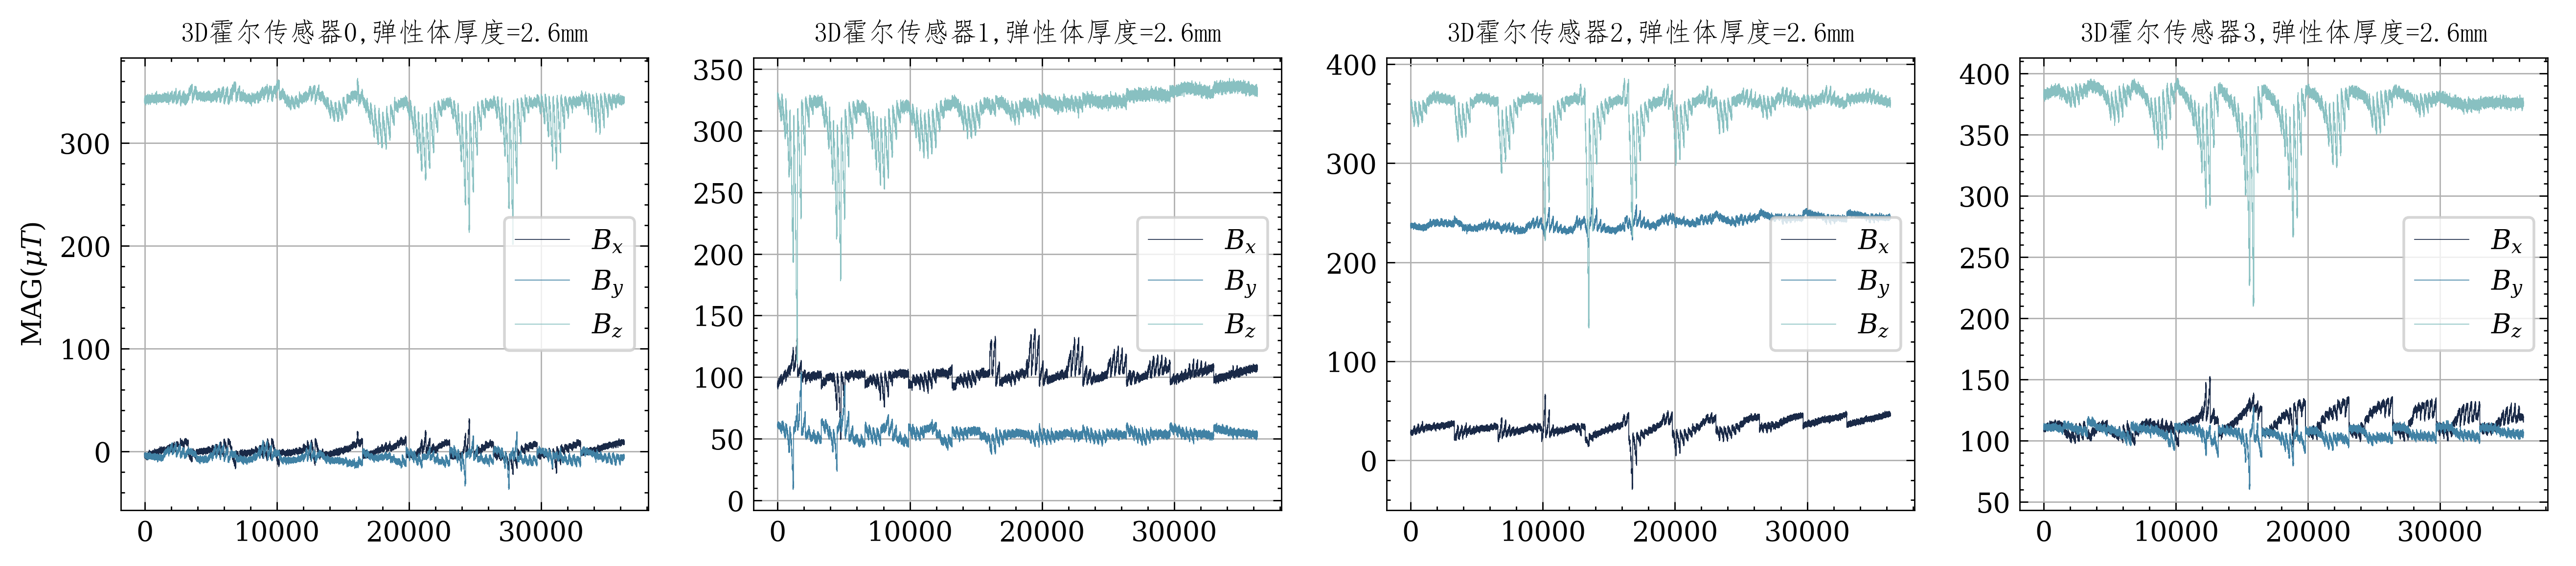

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots
# import matplotlib
# matplotlib.use('TkAgg')

color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9']
font1 = {'family': 'FangSong',
'weight': 'normal',
'size': 10,
}
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    for t in  tset:
        data = tset[t][:,5:]
        plt.figure(figsize=(16, 3))
        for i in range(0,4):
            plt.subplot(140+i+1)
            plt.plot(data[:,i*3+0],linewidth=0.3,color=color_table[0],label='$B_x$')
            plt.plot(data[:,i*3+1],linewidth=0.3,color=color_table[1],label='$B_y$')
            plt.plot(data[:,i*3+2],linewidth=0.3,color=color_table[2],label='$B_z$')
            if(i==0):
                plt.ylabel('MAG($\mu T$)')
            plt.title('3D霍尔传感器'+str(i)+',弹性体厚度='+t[1]+'.'+t[2]+'mm',fontdict=font1)
            plt.grid()
            plt.legend(loc='center right')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[  0.         0.       283.492175]
 [  0.         1.       288.712025]
 [  0.         2.       297.1894  ]
 [  0.         3.       308.62855 ]
 [  0.        -3.       318.6498  ]
 [  0.        -2.       304.499175]
 [  0.        -1.       289.762425]
 [  1.         0.       281.470225]
 [  1.         1.       284.23865 ]
 [  1.         2.       293.24135 ]
 [  1.         3.       303.8563  ]
 [  1.        -3.       312.7028  ]
 [  1.        -2.       300.246675]
 [  1.        -1.       287.8857  ]
 [  2.         0.       286.0659  ]
 [  2.         1.       288.084025]
 [  2.         2.       293.958775]
 [  2.         3.       301.242825]
 [  2.        -3.       309.55425 ]
 [  2.        -2.       299.063825]
 [  2.        -1.       289.80345 ]
 [  3.         0.       291.495975]
 [  3.         1.       292.325025]
 [  3.         2.       296.16425 ]
 [  3.         3.       301.784875]
 [  3.        -3.       308.299525]
 [  3.        -2.       300.936725]
 [  3.        -1.       294.

<Figure size 1200x1200 with 0 Axes>

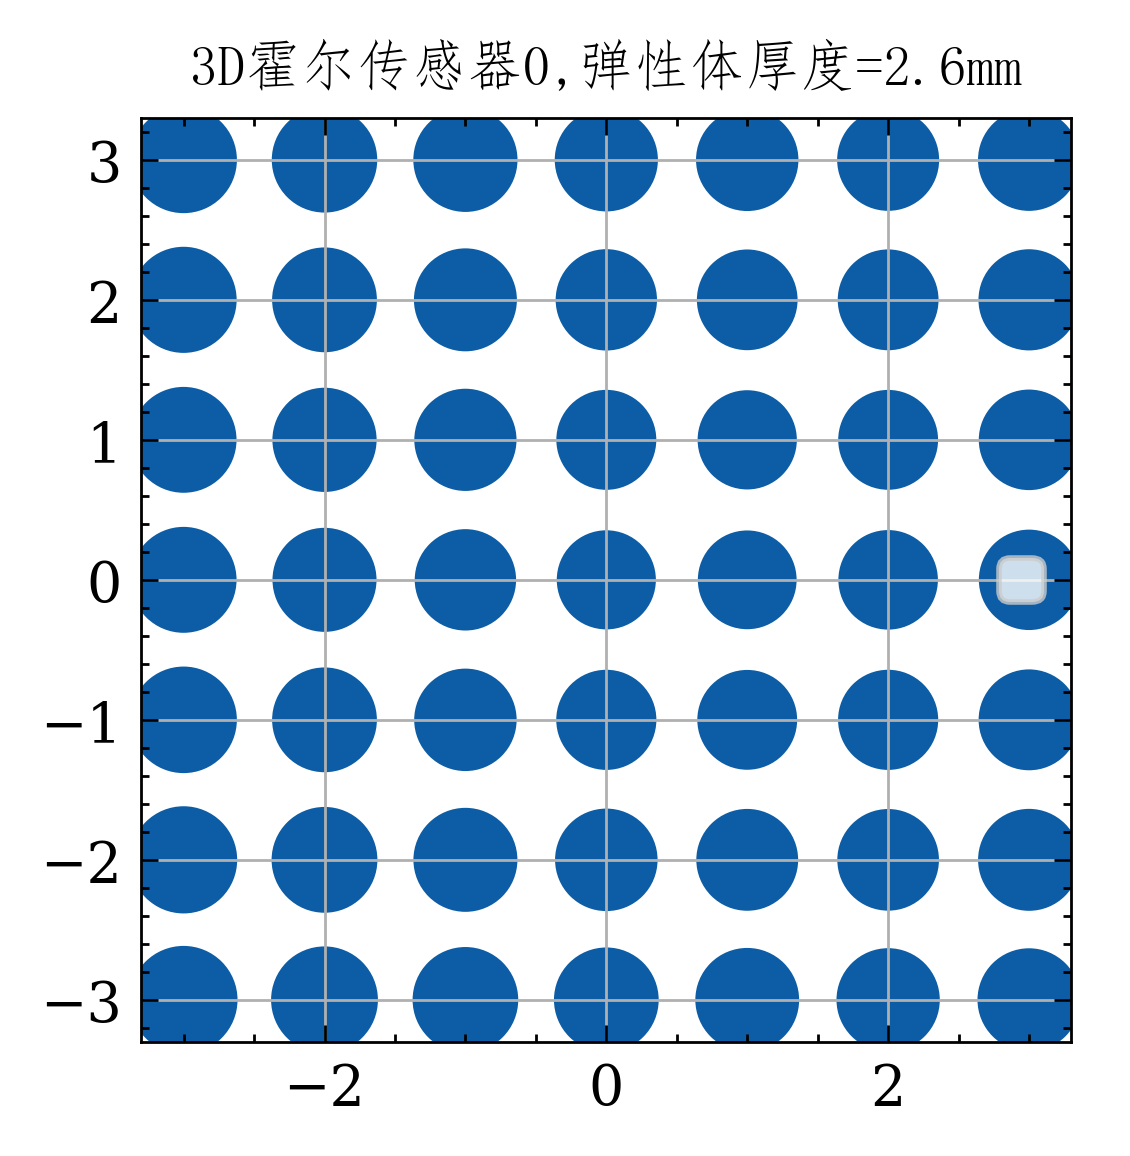

In [74]:
data = np.zeros((49*4,12))
press = np.zeros((49*4))
tdata = np.zeros((49,12))
for i in range(49*4):
    data[i,:] = np.average(tset['t26'][i*100:i*100+100,5:],axis=0)
    press[i] = np.average(tset['t26'][i*100:i*100+100,4])
for i in range(12):
    data[:,i] = ((data[:,i]))
for i in range(49):
    tdata[i,:] = np.average(data[i*4:i*4+4,:],axis=0)
def single_sensor():
    p = []
    l = [0,1,2,3,-3,-2,-1]
    for i in l:
        for j in l:
            p.append([i,j])
    return p
pl = single_sensor()

points = np.hstack((pl,tdata[:,2].reshape(49,1)))
print(points)
with plt.style.context(['science']):
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.figure(figsize=(3, 3))
    for i in range(0,1):
        plt.scatter(points[:,0],points[:,1],points[:,2])
        plt.title('3D霍尔传感器'+str(i)+',弹性体厚度='+t[1]+'.'+t[2]+'mm',fontdict=font1)
        plt.grid()
        plt.legend(loc='center right')

plt.show()

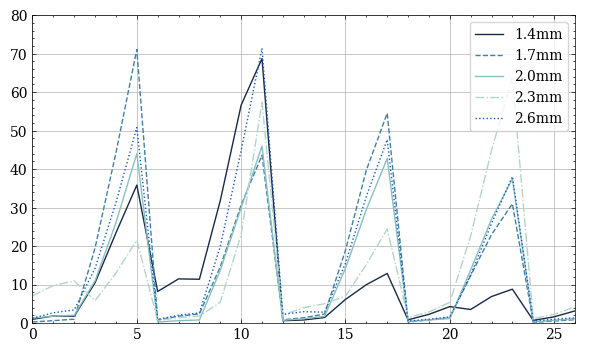

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots


    
color_table = ['#192947','#4081A4','#88C0C1','#B2D5C9','#185abd']
k=0
savg = np.zeros((5,36,12))
pavg = np.zeros((5,36))
for t in tset:
    tdata = tset[t]
    for i in  range(36):
        savg[k,i] = np.average(tdata[i*100:i*100+100,5:],axis=0)
        pavg[k,i] = np.average(tdata[i*100:i*100+100,4])
    k+=1      

k=0
m = np.zeros((5,27,12))
mp = np.zeros((5,27))
for t in tset:
    tdata = tset[t]
    for i in  range(9):
        for j in range(3):
            m[k,i*3+j,:] = savg[k,i*4+j+1]-savg[k,i*4]
            mp[k,i*3+j] = pavg[k,i*4+j+1]-pavg[k,i*4]
    k+=1
msum = np.std(np.abs(m),axis=2)
# msum = np.swapaxes(msum,0,1)
mp = np.swapaxes(mp,0,1)

with plt.style.context(['science']):
    plt.figure(figsize=(10, 6))
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 400 #图片像素
    plt.rcParams['figure.dpi'] = 400 #分辨率
    plt.rcParams["legend.frameon"] = True
    plt.rcParams['text.usetex'] = False
    plt.plot(msum[0],label = '1.4mm',color=color_table[0])
    plt.plot(msum[1],label = '1.7mm',color=color_table[1],linestyle='--')
    plt.plot(msum[2],label = '2.0mm',color=color_table[2])
    plt.plot(msum[3],label = '2.3mm',color=color_table[3],linestyle='-.')
    plt.plot(msum[4],label = '2.6mm',color=color_table[4],linestyle=':')
    plt.xlim([0,26])
    plt.ylim([0,80])
    plt.legend()
    plt.grid()
# plt.figure()
# vaildList = (3,4,5,15,16,17,20,21,22,23)
# snr = msum[vaildList,:]/mp[vaildList,:]
# snr = np.average(snr,axis=0)
# print(snr,np.shape(snr))
# plt.plot(snr)
plt.show()    

